<a href="https://colab.research.google.com/github/shriju/ModSec1/blob/main/sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
try:
    # Try reading the CSV file with UTF-8 encoding
    df = pd.read_csv('/content/main_sales.csv')
except UnicodeDecodeError:
    # If UTF-8 decoding fails, try reading with a different encoding
    df = pd.read_csv('/content/main_sales.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

Order Date  Order Quantity  Sales ID      Sales  \
0  10/13/2010               6       101   224.2944   
1   10/1/2012              49       102  9485.8512   
2   10/1/2012              27       103   232.2837   
3   7/10/2011              30       104  5409.3240   
4   8/28/2010              19       105   380.7144   

                                        Product Name  \
0   Eldon Base for stackable storage shelf, platinum   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl   
3                                               R380   
4                           Holmes HEPA Air Purifier   

             Product Sub-Category Product Category  Discount  Unit Price  \
0          Storage & Organization  Office Supplies      0.04       38.94   
1                      Appliances  Office Supplies      0.07      208.16   
2  Binders and Binder Accessories  Office Supplies      0.01        8.69   
3    Telephones and Communication       Technology      0.08      195.99   
4                      Appliances  Office Supplies      0.08       21.78   

   Product Base Margin     Profit Product ID  Advertising Expenditure  \
0                 0.80   177.5664      OF_01                   1.9470   
1                 0.58  5201.9184      OF_02                  10.4080   
2                 0.39    89.1594      OF_03                   0.4345   
3                 0.58  2939.8500      TE_01                  29.3985   
4                 0.50   173.8044      OF_04                   1.0890   

   Sales Representative  Product Review Rating Customer ID    Customer Name  \
0                     1                      5    CG-12520      Claire Gute   
1                     1                      2    CG-12520      Claire Gute   
2                     2                      5    DV-13045  Darrin Van Huff   
3                     3                      1    SO-20335   Sean O'Donnell   
4                     2                      4    SO-20335   Sean O'Donnell   

  Customer Segment                    Email ID                   Address  \
0   Small Business     claire_gute@example.com       Henderson, Kentucky   
1         Consumer     claire_gute@example.com       Henderson, Kentucky   
2         Consumer     darrin_huff@example.com   Los Angeles, California   
3        Corporate  sean_o'donnell@example.com  Fort Lauderdale, Florida   
4         Consumer  sean_o'donnell@example.com  Fort Lauderdale, Florida   

  Region  Region ID  
0  South          1  
1  South          1  
2   West          2  
3  South          1  
4  South          1

In [ ]:
df.shape

(1000, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order Date               1000 non-null   object 
 1   Order Quantity           1000 non-null   int64  
 2   Sales ID                 1000 non-null   int64  
 3   Sales                    1000 non-null   float64
 4   Product Name             1000 non-null   object 
 5   Product Sub-Category     1000 non-null   object 
 6   Product Category         1000 non-null   object 
 7   Discount                 1000 non-null   float64
 8   Unit Price               1000 non-null   float64
 9   Product Base Margin      990 non-null    float64
 10  Profit                   990 non-null    float64
 11  Product ID               1000 non-null   object 
 12  Advertising Expenditure  1000 non-null   float64
 13  Sales Representative     1000 non-null   int64  
 14  Product Review Rating    

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               1000 non-null   datetime64[ns]
 1   Order Quantity           1000 non-null   int64         
 2   Sales ID                 1000 non-null   int64         
 3   Sales                    1000 non-null   float64       
 4   Product Name             1000 non-null   object        
 5   Product Sub-Category     1000 non-null   object        
 6   Product Category         1000 non-null   object        
 7   Discount                 1000 non-null   float64       
 8   Unit Price               1000 non-null   float64       
 9   Product Base Margin      990 non-null    float64       
 10  Profit                   990 non-null    float64       
 11  Product ID               1000 non-null   object        
 12  Advertising Expenditure  1000 non-n

In [ ]:
df.isnull().sum()

Order Date                  0
Order Quantity              0
Sales ID                    0
Sales                       0
Product Name                0
Product Sub-Category        0
Product Category            0
Discount                    0
Unit Price                  0
Product Base Margin        10
Profit                     10
Product ID                  0
Advertising Expenditure     0
Sales Representative        0
Product Review Rating       0
Customer ID                 0
Customer Name               0
Customer Segment            0
Email ID                    0
Address                     0
Region                      0
Region ID                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sales'].mean()

1792.3565458

In [ ]:
df['Sales'].median()

498.61744999999996

In [ ]:
df['Sales'].min()

2.7648

In [ ]:
df['Sales'].max()

27599.54

In [ ]:
df.describe()

Order Quantity     Sales ID         Sales     Discount   Unit Price  \
count     1000.000000  1000.000000   1000.000000  1000.000000  1000.000000   
mean        25.757000   600.500000   1792.356546     0.049730    86.691280   
std         14.686853   288.819436   3345.633195     0.032494   206.189401   
min          1.000000   101.000000      2.764800     0.000000     1.260000   
25%         13.000000   350.750000    158.473350     0.020000     6.825000   
50%         26.000000   600.500000    498.617450     0.050000    22.980000   
75%         39.000000   850.250000   1706.252400     0.080000    99.990000   
max         50.000000  1100.000000  27599.540000     0.250000  3499.990000   

       Product Base Margin        Profit  Advertising Expenditure  \
count           990.000000    990.000000              1000.000000   
mean              0.516333    935.295515                 9.341249   
std               0.136680   1789.860701                27.522789   
min               0.350000      1.008000                 0.063000   
25%               0.380000     60.902400                 0.368875   
50%               0.540000    221.479350                 1.998500   
75%               0.590000    892.835100                 9.898500   
max               0.850000  19339.398000               524.998500   

       Sales Representative  Product Review Rating    Region ID  
count           1000.000000             1000.00000  1000.000000  
mean               1.965000                3.60100     2.730000  
std                0.908075                1.23504     1.051763  
min                1.000000                1.00000     1.000000  
25%                1.000000                3.00000     2.000000  
50%                2.000000                4.00000     3.000000  
75%                2.000000                5.00000     4.000000  
max                4.000000                5.00000     4.000000

In [ ]:
df['Product Sub-Category'].nunique()

17

In [ ]:
sub_category=df['Product Sub-Category'].value_counts().reset_index()
sub_category

index  Product Sub-Category
0                            Paper                   129
1   Binders and Binder Accessories                   120
2     Telephones and Communication                   104
3               Office Furnishings                   100
4             Computer Peripherals                    90
5           Storage & Organization                    68
6              Pens & Art Supplies                    63
7               Chairs & Chairmats                    61
8                       Appliances                    50
9                           Labels                    39
10                 Office Machines                    35
11                          Tables                    32
12                       Envelopes                    29
13                       Bookcases                    26
14   Scissors, Rulers and Trimmers                    21
15                    Rubber Bands                    19
16                 Copiers and Fax                    14

###Level 2: Data Cleaning and Preprocessing



##### Finding duplicated rows

In [ ]:
df.duplicated().sum() # no duplicate rows in the dataset

0

#### Handle missing values by filling them with appropriate values (e.g., mean or median).

In [ ]:
df.isnull().sum() # There are 10 missing values in Product Base Margin and Profit each.

Order Date                  0
Order Quantity              0
Sales ID                    0
Sales                       0
Product Name                0
Product Sub-Category        0
Product Category            0
Discount                    0
Unit Price                  0
Product Base Margin        10
Profit                     10
Product ID                  0
Advertising Expenditure     0
Sales Representative        0
Product Review Rating       0
Customer ID                 0
Customer Name               0
Customer Segment            0
Email ID                    0
Address                     0
Region                      0
Region ID                   0
dtype: int64

In [ ]:
df[df['Profit'].isnull() | df['Product Base Margin'].isnull()] # Extracting only columns from Profit and Product Base Margin values are missing

Order Date  Order Quantity  Sales ID       Sales  \
7   2011-06-17              22       108    856.0552   
8   2011-03-24              21       109   2697.8742   
71  2011-08-07              22       172   5954.8720   
213 2011-08-10              17       314   5703.0240   
274 2011-03-26              44       375   5774.2520   
375 2010-03-29              31       476   8219.7120   
441 2011-11-05              45       542  15253.4925   
510 2011-08-25              37       611   4555.0848   
601 2009-01-24              30       702   6436.8000   
905 2012-03-04               7      1006   1778.7280   

                                          Product Name  \
7              SAFCO Mobile Desk Side File, Wire Frame   
8                SAFCO Commercial Wire Shelving, Black   
71                            SAFCO Arco Folding Chair   
213  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
274              SAFCO Commercial Wire Shelving, Black   
375                           SAFCO Arco Folding Chair   
441  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
510                        SAFCO Folding Chair Trolley   
601                    Safco Contoured Stacking Chairs   
905                           SAFCO Arco Folding Chair   

       Product Sub-Category Product Category  Discount  Unit Price  \
7    Storage & Organization  Office Supplies      0.09       42.76   
8    Storage & Organization  Office Supplies      0.07      138.14   
71       Chairs & Chairmats        Furniture      0.02      276.20   
213                  Tables        Furniture      0.04      349.45   
274  Storage & Organization  Office Supplies      0.05      138.14   
375      Chairs & Chairmats        Furniture      0.04      276.20   
441                  Tables        Furniture      0.03      349.45   
510      Chairs & Chairmats        Furniture      0.04      128.24   
601      Chairs & Chairmats        Furniture      0.10      238.40   
905      Chairs & Chairmats        Furniture      0.08      276.20   

     Product Base Margin  Profit Product ID  Advertising Expenditure  \
7                    NaN     NaN      OF_06                    2.138   
8                    NaN     NaN      OF_07                    6.907   
71                   NaN     NaN      FU_12                   27.620   
213                  NaN     NaN      FU_44                   34.945   
274                  NaN     NaN      OF_07                    6.907   
375                  NaN     NaN      FU_12                   27.620   
441                  NaN     NaN      FU_44                   34.945   
510                  NaN     NaN      FU_85                   12.824   
601                  NaN     NaN      FU_99                   23.840   
905                  NaN     NaN      FU_12                   27.620   

     Sales Representative  Product Review Rating Customer ID  \
7                       1                      4    BH-11710   
8                       1                      4    BH-11710   
71                      3                      4    TB-21520   
213                     4                      4    VW-21775   
274                     2                      5    BB-10990   
375                     2                      5    AG-10900   
441                     3                      3    PK-19075   
510                     3                      3    LS-17245   
601                     3                      3    CK-12205   
905                     4                      1    LC-17140   

           Customer Name Customer Segment                         Email ID  \
7        Brosina Hoffman        Corporate      brosina_hoffman@example.com   
8        Brosina Hoffman        Corporate      brosina_hoffman@example.com   
71       Tracy Blumstein        Corporate      tracy_blumstein@example.com   
213      Victoria Wilson   Small Business      victoria_wilson@example.com   
274      Barry Blumstein        Corporate      barry_blumstein@example.com   
375        

In [ ]:
df[df['Product Name'].str.startswith('SAFCO')] # Extracting all the rows that has SAFCO as missing rows are related to it.

Order Date  Order Quantity  Sales ID       Sales  \
7   2011-06-17              22       108    856.0552   
8   2011-03-24              21       109   2697.8742   
71  2011-08-07              22       172   5954.8720   
213 2011-08-10              17       314   5703.0240   
274 2011-03-26              44       375   5774.2520   
375 2010-03-29              31       476   8219.7120   
441 2011-11-05              45       542  15253.4925   
510 2011-08-25              37       611   4555.0848   
905 2012-03-04               7      1006   1778.7280   

                                          Product Name  \
7              SAFCO Mobile Desk Side File, Wire Frame   
8                SAFCO Commercial Wire Shelving, Black   
71                            SAFCO Arco Folding Chair   
213  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
274              SAFCO Commercial Wire Shelving, Black   
375                           SAFCO Arco Folding Chair   
441  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
510                        SAFCO Folding Chair Trolley   
905                           SAFCO Arco Folding Chair   

       Product Sub-Category Product Category  Discount  Unit Price  \
7    Storage & Organization  Office Supplies      0.09       42.76   
8    Storage & Organization  Office Supplies      0.07      138.14   
71       Chairs & Chairmats        Furniture      0.02      276.20   
213                  Tables        Furniture      0.04      349.45   
274  Storage & Organization  Office Supplies      0.05      138.14   
375      Chairs & Chairmats        Furniture      0.04      276.20   
441                  Tables        Furniture      0.03      349.45   
510      Chairs & Chairmats        Furniture      0.04      128.24   
905      Chairs & Chairmats        Furniture      0.08      276.20   

     Product Base Margin  Profit Product ID  Advertising Expenditure  \
7                    NaN     NaN      OF_06                    2.138   
8                    NaN     NaN      OF_07                    6.907   
71                   NaN     NaN      FU_12                   27.620   
213                  NaN     NaN      FU_44                   34.945   
274                  NaN     NaN      OF_07                    6.907   
375                  NaN     NaN      FU_12                   27.620   
441                  NaN     NaN      FU_44                   34.945   
510                  NaN     NaN      FU_85                   12.824   
905                  NaN     NaN      FU_12                   27.620   

     Sales Representative  Product Review Rating Customer ID    Customer Name  \
7                       1                      4    BH-11710  Brosina Hoffman   
8                       1                      4    BH-11710  Brosina Hoffman   
71                      3                      4    TB-21520  Tracy Blumstein   
213                     4                      4    VW-21775  Victoria Wilson   
274                     2                      5    BB-10990  Barry Blumstein   
375                     2                      5    AG-10900    Arthur Gainer   
441                     3                      3    PK-19075        Pete Kriz   
510                     3                      3    LS-17245       Lynn Smith   
905                     4                      1    LC-17140     Logan Currie   

    Customer Segment                     Email ID                  Address  \
7          Corporate  brosina_hoffman@example.com  Los Angeles, California   
8          Corporate  brosina_hoffman@example.com  Los Angeles, California   
71         Corporate  tracy_blumstein@example.com        Jackson, Michigan   
213   Small Business  victoria_wilson@example.com             Medina, Ohio   
274        Corporate  barry_blumstein@example.com    Inglewood, California   
375        Corporate    arthur_gainer@example.com          Tucson, Arizona   
441   Small Business        pete_kriz@example.com        Detroit, Michigan   
510  

In [ ]:
df[df['Product Sub-Category'].str.startswith('Storage')]

Order Date  Order Quantity  Sales ID       Sales  \
0   2010-10-13               6       101    224.2944   
7   2011-06-17              22       108    856.0552   
8   2011-03-24              21       109   2697.8742   
28  2010-11-08              28       129    362.3424   
66  2010-06-04              40       167    401.1200   
77  2012-05-04              40       178   3239.2000   
84  2011-10-10               7       185   1878.1056   
100 2012-11-29              48       201   4796.4960   
106 2010-06-24               4       207     57.7760   
116 2010-02-09              28       217    575.6912   
121 2009-09-11              40       222    431.6400   
148 2012-04-09               8       249    278.0800   
169 2011-06-07               8       270    205.8784   
177 2011-09-05              30       278    364.7160   
192 2010-04-01              16       293    796.1760   
232 2011-08-08              20       333    632.6320   
242 2009-03-11              18       343   3477.0600   
246 2011-08-12              48       347  17272.8288   
261 2009-08-26               2       362    765.2192   
274 2011-03-26              44       375   5774.2520   
283 2009-05-01               2       384    773.5368   
287 2010-10-15              34       388    920.1556   
288 2010-10-15              23       389   2129.0433   
293 2012-09-16              28       394    416.9088   
308 2012-10-06               8       409    111.3768   
310 2010-02-06              25       411    743.5000   
311 2010-02-06               4       412     44.9328   
314 2009-08-20               3       415     46.1580   
315 2009-08-20              47       416  10047.1430   
339 2010-06-08              24       440   1126.8864   
344 2010-02-26              18       445   1311.8760   
345 2012-05-21              32       446    363.3696   
371 2011-09-22               7       472    107.7020   
423 2011-02-17               1       524     11.7888   
436 2011-10-03              39       537   1241.3856   
440 2011-11-05              48       541    565.8624   
462 2010-12-28              14       563   2105.7148   
466 2009-11-25              31       567    168.6958   
481 2012-07-09               5       582    295.6590   
504 2010-12-14              12       605   1538.0820   
507 2010-06-17               1       608    265.5060   
526 2012-05-26               1       627     25.2525   
546 2009-11-19              33       647    685.4166   
595 2011-04-29              45       696    467.4060   
648 2009-11-24               1       749     11.6660   
688 2011-03-26              18       789   3600.4050   
705 2012-05-05              28       806   4206.7620   
709 2010-06-14              14       810   1853.5860   
715 2012-11-29              38       816    734.2740   
717 2009-09-24              22       818   1076.0200   
743 2010-07-15              35       844   6355.2930   
745 2011-03-04              35       846    522.0250   
750 2010-02-22              39       851    785.4912   
753 2011-01-22              34       854   1988.3880   
755 2011-07-28              50       856    734.2900   
768 2010-06-26              27       869    352.2933   
778 2009-04-18              28       879   1335.3480   
785 2011-12-14              50       886   7675.4700   
788 2010-10-01              22       889    240.9286   
791 2011-09-24              39       892   1080.8616   
793 2011-11-10              37       894    555.1406   
805 2012-10-01              17       906    211.4800   
813 2009-07-06               3       914     45.5994   
883 2010-06-03              46       984   7282.6740   
885 2010-05-22               4       986    113.0120   
891 2010-01-05              44       992    699.3976   
931 2010-02-27              40      1032   4441.2000   
950 2010-06-25              47      1051    654.8087   

                                          Product Name  \
0     Eldon Base for stackable storage shelf, platinum   
7              SAFCO Mo

In [ ]:
# df['Profit']=df['Profit'].fillna(df.mean())
# Here, taking product sub category average to fill up the missing values.
# In the 'Product Sub Category, We have missing values for:1)Storage & Organization, 2)Chairs & Chairmats, 3) Tables
# Taking the average of those categories individually

In [ ]:
fill_storage_mean = df[df['Product Sub-Category'].str.contains('Storage & Organization')]

# Calculate the average of 'Product Base Margin' for 'Storage & Organization' 'Product Sub Category'
average_margin_stor = fill_storage_mean['Product Base Margin'].mean()

print("Average Product Base Margin for 'Storage & Organization':", average_margin_stor)

Average Product Base Margin for 'Storage & Organization': 0.6624615384615385


In [ ]:
filtered_chair_mean = df[df['Product Sub-Category'].str.contains('Chairs & Chairmats')]

# Calculate the average of 'Product Base Margin' for 'Chairs & Chairmats' 'Product Sub Category'
average_margin_chair = filtered_chair_mean['Product Base Margin'].mean()

print("Average Product Base Margin for 'Chairs & Chairmats':", average_margin_chair)

Average Product Base Margin for 'Chairs & Chairmats': 0.6183928571428572


In [ ]:
filtered_table_mean = df[df['Product Sub-Category'].str.contains('Tables')]

# Calculate the average of 'Product Base Margin'
average_margin_table = filtered_table_mean['Product Base Margin'].mean()

print("Average Product Base Margin for 'Tables':", average_margin_table)

Average Product Base Margin for 'Tables': 0.6950000000000001


In [ ]:
fill_product_margin=(average_margin_stor+average_margin_chair+average_margin_table)/3
fill_product_margin

0.6586181318681319

In [ ]:
df['Product Base Margin'].fillna(fill_product_margin, inplace=True)

In [ ]:
df[df['Profit'].isnull() | df['Product Base Margin'].isnull()] # we filled up the missing values for Bsse Margin,
                                                              # now need to fill up missing values for Profit

Order Date  Order Quantity  Sales ID       Sales  \
7   2011-06-17              22       108    856.0552   
8   2011-03-24              21       109   2697.8742   
71  2011-08-07              22       172   5954.8720   
213 2011-08-10              17       314   5703.0240   
274 2011-03-26              44       375   5774.2520   
375 2010-03-29              31       476   8219.7120   
441 2011-11-05              45       542  15253.4925   
510 2011-08-25              37       611   4555.0848   
601 2009-01-24              30       702   6436.8000   
905 2012-03-04               7      1006   1778.7280   

                                          Product Name  \
7              SAFCO Mobile Desk Side File, Wire Frame   
8                SAFCO Commercial Wire Shelving, Black   
71                            SAFCO Arco Folding Chair   
213  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
274              SAFCO Commercial Wire Shelving, Black   
375                           SAFCO Arco Folding Chair   
441  SAFCO PlanMaster Heigh-Adjustable Drafting Tab...   
510                        SAFCO Folding Chair Trolley   
601                    Safco Contoured Stacking Chairs   
905                           SAFCO Arco Folding Chair   

       Product Sub-Category Product Category  Discount  Unit Price  \
7    Storage & Organization  Office Supplies      0.09       42.76   
8    Storage & Organization  Office Supplies      0.07      138.14   
71       Chairs & Chairmats        Furniture      0.02      276.20   
213                  Tables        Furniture      0.04      349.45   
274  Storage & Organization  Office Supplies      0.05      138.14   
375      Chairs & Chairmats        Furniture      0.04      276.20   
441                  Tables        Furniture      0.03      349.45   
510      Chairs & Chairmats        Furniture      0.04      128.24   
601      Chairs & Chairmats        Furniture      0.10      238.40   
905      Chairs & Chairmats        Furniture      0.08      276.20   

     Product Base Margin  Profit Product ID  Advertising Expenditure  \
7               0.658618     NaN      OF_06                    2.138   
8               0.658618     NaN      OF_07                    6.907   
71              0.658618     NaN      FU_12                   27.620   
213             0.658618     NaN      FU_44                   34.945   
274             0.658618     NaN      OF_07                    6.907   
375             0.658618     NaN      FU_12                   27.620   
441             0.658618     NaN      FU_44                   34.945   
510             0.658618     NaN      FU_85                   12.824   
601             0.658618     NaN      FU_99                   23.840   
905             0.658618     NaN      FU_12                   27.620   

     Sales Representative  Product Review Rating Customer ID  \
7                       1                      4    BH-11710   
8                       1                      4    BH-11710   
71                      3                      4    TB-21520   
213                     4                      4    VW-21775   
274                     2                      5    BB-10990   
375                     2                      5    AG-10900   
441                     3                      3    PK-19075   
510                     3                      3    LS-17245   
601                     3                      3    CK-12205   
905                     4                      1    LC-17140   

           Customer Name Customer Segment                         Email ID  \
7        Brosina Hoffman        Corporate      brosina_hoffman@example.com   
8        Brosina Hoffman        Corporate      brosina_hoffman@example.com   
71       Tracy Blumstein        Corporate      tracy_blumstein@example.com   
213      Victoria Wilson   Small Business      victoria_wilson@example.com   
274      Barry Blumstein        Corporate      barry_blumstein@example.com   
375        

In [ ]:
fill_profit=(df['Sales']*df['Product Base Margin'])-df['Advertising Expenditure'] # calculate profit= ((Sales * Profit Margin)- Advertizing Exp)

In [ ]:
df['Profit'].fillna(fill_profit, inplace=True) # filling up the missing values in profit

In [ ]:
df[df['Profit'].isnull() | df['Product Base Margin'].isnull()] # Now, there is not missing values

Empty DataFrame
Columns: [Order Date, Order Quantity, Sales ID, Sales, Product Name, Product Sub-Category, Product Category, Discount, Unit Price, Product Base Margin, Profit, Product ID, Advertising Expenditure, Sales Representative, Product Review Rating, Customer ID, Customer Name, Customer Segment, Email ID, Address, Region, Region ID]
Index: []

### Identify and remove outliers from the dataset using appropriate techniques.

In [ ]:
df.isnull().sum() # No missing values

Order Date                 0
Order Quantity             0
Sales ID                   0
Sales                      0
Product Name               0
Product Sub-Category       0
Product Category           0
Discount                   0
Unit Price                 0
Product Base Margin        0
Profit                     0
Product ID                 0
Advertising Expenditure    0
Sales Representative       0
Product Review Rating      0
Customer ID                0
Customer Name              0
Customer Segment           0
Email ID                   0
Address                    0
Region                     0
Region ID                  0
dtype: int64

<ipython-input-42-319f7c5bd991>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales'>

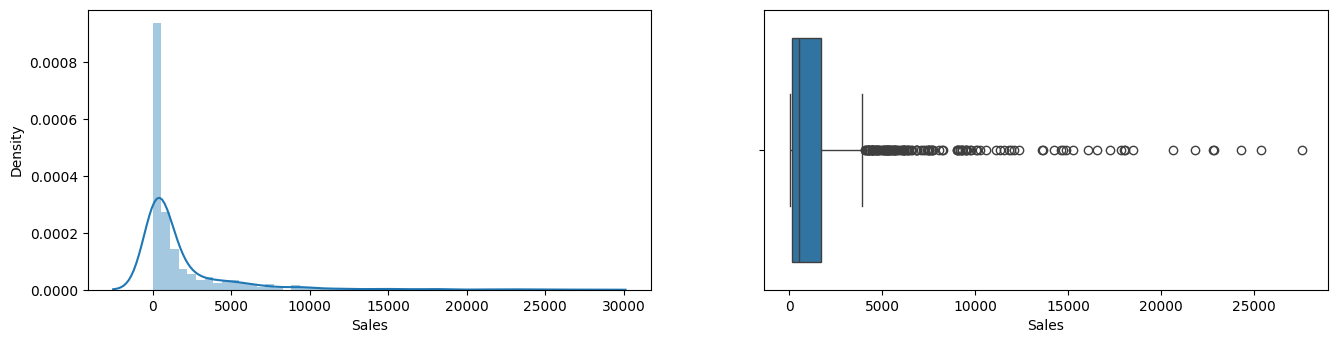

In [ ]:
# Finding the shape of the distribution in 'Sales' column in order to figure out which outlier handling technique should be used
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Sales'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Sales'])

In [ ]:
#The above figure shows that the data is skewed at the right side and there are many outliers, so decided to go with IQR method
# Finding the IQR, IQR=75th percentile-25th percentile
percentile25=df['Sales'].quantile(0.25)
percentile75=df['Sales'].quantile(0.75)

In [ ]:
percentile25

158.47335

In [ ]:
percentile75

1706.2523999999999

In [ ]:
# Finding Interquartile range of the disbution
iqr=percentile75-percentile25
iqr

1547.7790499999999

In [ ]:
# Setting up upper limit and lower limit
upper_limit=iqr+1.5*iqr
lower_limit=iqr-1.5*iqr
print("Upper Limit", upper_limit)
print("Lower Limit", lower_limit)

Upper Limit 3869.447625
Lower Limit -773.8895249999998


In [ ]:
# Extracting rows greater than upper limit: Outlier rows: will be removed from the new dataset
df_higher_upper=df[df['Sales']>upper_limit]

In [ ]:
df_higher_upper # outlier rows

Order Date  Order Quantity  Sales ID       Sales  \
1   2012-10-01              49       102   9485.8512   
3   2011-07-10              30       104   5409.3240   
17  2012-02-14              44       118   4265.3952   
27  2010-12-23              25       128  11137.2525   
37  2009-10-09              49       138   5394.4982   
39  2010-12-09              30       140  13676.7540   
48  2011-08-31              30       149   4632.9030   
60  2009-03-20               6       161   9432.1728   
71  2011-08-07              22       172   5954.8720   
85  2012-10-07              36       186  11324.1744   
89  2011-08-16              32       190   4511.3600   
90  2011-08-16              44       191   9499.5648   
94  2010-11-16              29       195   7525.1781   
100 2012-11-29              48       201   4796.4960   
107 2010-06-24              26       208   4428.4630   
108 2012-09-19              46       209   9060.6292   
109 2012-09-19              23       210   4424.2110   
112 2011-10-15              12       213  21860.8656   
113 2010-08-07              24       214   5222.4768   
115 2010-02-09              44       216  20679.5864   
119 2010-08-30              19       220   5045.6476   
131 2012-10-23              34       232   5290.1212   
133 2010-01-25              48       234   9062.7264   
136 2011-01-27              39       237   5332.1970   
139 2011-03-17              18       240   4303.8072   
154 2009-02-18              30       255   9718.2540   
158 2012-06-27              49       259   7108.4643   
162 2011-09-14               4       263   5114.1264   
173 2009-10-09              49       274   6173.5100   
175 2009-06-07              18       276  22877.8200   
188 2009-01-30              31       289  16569.7542   
200 2009-01-06              30       301  25372.2240   
210 2010-11-23              43       311   7669.0887   
211 2009-08-02              24       312   4678.5816   
213 2011-08-10              17       314   5703.0240   
215 2012-06-28              47       316   9569.3880   
219 2012-11-26               3       320   4097.6481   
229 2010-01-16              30       330   4484.1060   
234 2011-06-20              26       335   5355.7400   
238 2009-09-04              48       339   7188.0192   
245 2012-03-02              37       346   5586.2600   
246 2011-08-12              48       347  17272.8288   
252 2011-09-02              34       353   4457.7876   
268 2009-07-02              49       369  12082.5523   
269 2011-04-15              22       370   5684.1444   
270 2011-11-25              49       371  18060.9345   
271 2011-11-25              48       372   7727.0400   
273 2011-03-26              35       374  16099.6780   
274 2011-03-26              44       375   5774.2520   
280 2012-11-23              21       381   6280.0500   
302 2010-11-24              41       403   5694.9656   
315 2009-08-20              47       416  10047.1430   
320 2010-02-27              31       421  14598.2658   
329 2009-10-23              19       430  12368.8233   
332 2011-01-10              28       433   5696.2500   
349 2012-08-17              20       450   5568.1840   
351 2012-11-09              15       452  18492.9045   
352 2011-06-02              40       453   4772.0120   
354 2011-08-10              41       455   8047.1520   
361 2012-02-23              36       462   4302.3744   
365 2010-03-12              36       466   4161.9816   
375 2010-03-29              31       476   8219.7120   
377 2012-09-12              35       478   6893.6140   
389 2010-12-31              39       490   6163.6419   
396 2010-05-19              34       497  14882.4324   
400 2010-09-01              40       501   7396.4320   
403 2010-05-07              28       504   3908.2428   
419 2009-11-23              48       520   9306.9600   
432 2012-07-03              49       533   9315.4047   
441 2011-11-05              45       542  15253.4925   
448 2010-03-31              

In [ ]:
df[df['Sales']<lower_limit] # doesn't have any meaning as sales cannot be less than zero.

Empty DataFrame
Columns: [Order Date, Order Quantity, Sales ID, Sales, Product Name, Product Sub-Category, Product Category, Discount, Unit Price, Product Base Margin, Profit, Product ID, Advertising Expenditure, Sales Representative, Product Review Rating, Customer ID, Customer Name, Customer Segment, Email ID, Address, Region, Region ID]
Index: []

Trimming

In [ ]:
new_df1=df[df['Sales']<upper_limit] # Rows that are within the boundary: inlier rows

In [ ]:
new_df1

Order Date  Order Quantity  Sales ID      Sales  \
0   2010-10-13               6       101   224.2944   
2   2012-10-01              27       103   232.2837   
4   2010-08-28              19       105   380.7144   
5   2010-08-28              21       106   132.4680   
6   2011-06-17              12       107    84.9720   
7   2011-06-17              22       108   856.0552   
8   2011-03-24              21       109  2697.8742   
9   2010-02-26              44       110   203.7816   
10  2010-11-23              45       111   190.6740   
11  2010-11-23              32       112   121.3440   
12  2012-06-08              32       113   696.9600   
13  2012-06-08              31       114  1427.8848   
14  2012-08-04              15       115    77.6160   
15  2011-05-30              46       116  1779.8918   
16  2009-11-25              16       117   234.2112   
18  2012-02-14              11       119   588.8025   
19  2012-04-15              15       120   930.4590   
20  2012-04-15              18       121  2779.7418   
21  2010-03-12              13       122    43.1730   
22  2010-03-12              21       123    93.9645   
23  2011-03-09              33       124   474.9030   
24  2011-03-09              38       125   176.5290   
25  2012-08-04              30       126    78.6240   
26  2011-05-06              23       127    61.4008   
28  2010-11-08              28       129   362.3424   
29  2012-10-21              49       130   274.0864   
30  2011-01-01              10       131    59.2020   
31  2011-01-01              21       132   809.1426   
32  2011-10-10              39       133   276.5373   
33  2011-10-10              24       134   498.7224   
34  2010-09-23              27       135  1017.4464   
35  2011-07-19              39       136  3480.1065   
36  2009-10-09              47       137   182.8300   
38  2009-10-09              18       139   501.8760   
40  2012-10-08               5       141    36.8480   
41  2012-05-02              21       142   398.3700   
42  2010-03-08               8       143   927.9200   
43  2011-05-28               5       144    14.2560   
44  2010-09-19               9       145    37.9008   
45  2011-08-31              11       146  1330.4544   
46  2011-08-31              50       147   181.8750   
47  2011-08-31               3       148    34.2612   
49  2011-07-08               7       150    54.7470   
50  2009-01-30              42       151  1201.2840   
51  2012-01-08              11       152    43.3422   
52  2010-11-07              22       153   122.8920   
53  2010-04-29              12       154   105.3780   
54  2011-12-31               8       155    63.9200   
55  2009-08-12               7       156   366.0300   
56  2009-08-12               3       157   239.0256   
57  2011-11-12              44       158  3733.4704   
58  2011-11-12              25       159  1999.2675   
59  2012-01-20              19       160   202.8516   
61  2012-07-21              40       162   248.8320   
62  2012-07-21              18       163   111.9744   
63  2012-06-12              11       164   287.9745   
64  2009-01-15              41       165   202.1382   
65  2009-01-15              47       166   286.5120   
66  2010-06-04              40       167   401.1200   
67  2010-02-18              18       168   124.8300   
68  2011-11-16              32       169  1263.3600   
69  2011-11-16               5       170   459.4590   
70  2011-11-16              41       171   786.4128   
72  2010-06-08              50       173   744.3250   
73  2009-10-17              37       174   932.4222   
74  2011-08-28               4       175  1155.7632   
75  2011-09-29              19       176   353.0466   
76  2011-09-29              24       177   139.9680   
77  2012-05-04              40       178  3239.2000   
78  2011-05-17               5       179     8.6480   
79  2011-05-17              41       180   239.1120   
80  2011-05-17              35       181  32

In [ ]:
new_df1.shape

(860, 22)

<ipython-input-54-6814a42dba32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])
<ipython-input-54-6814a42dba32>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df1['Sales'])


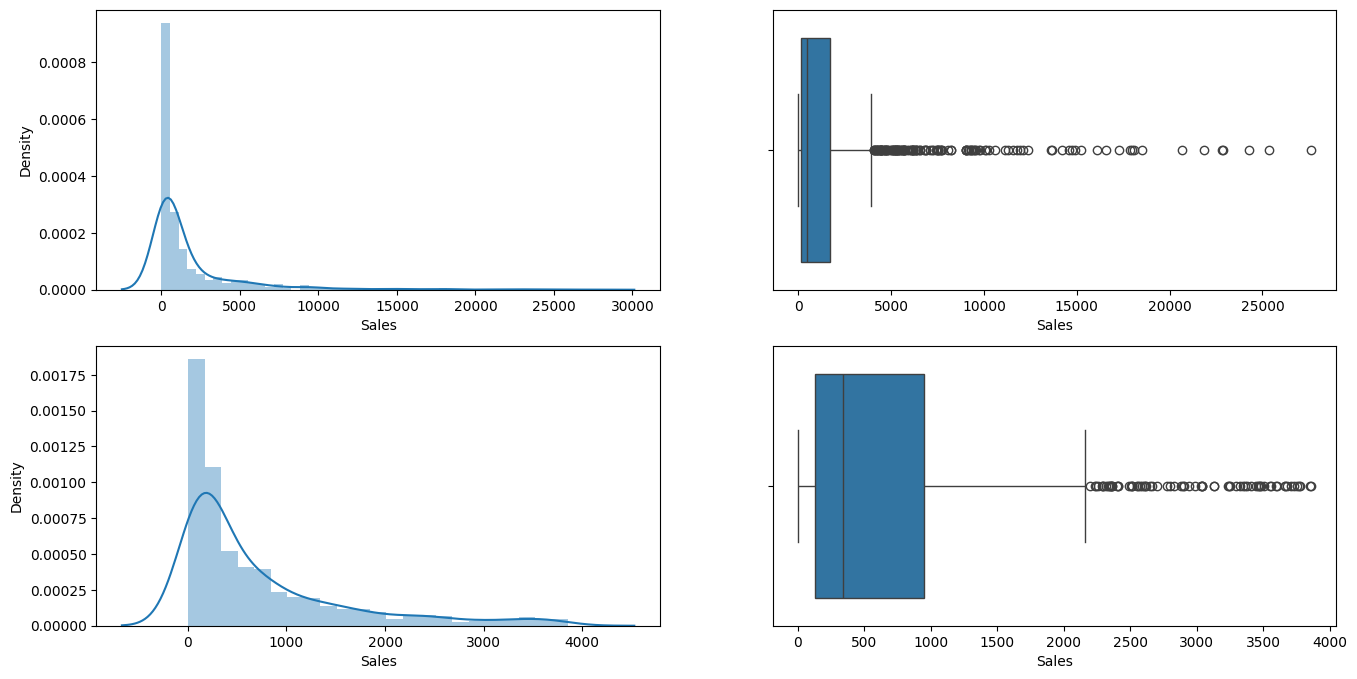

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Sales'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Sales'])

plt.subplot(2,2,3)
sns.distplot(new_df1['Sales'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df1['Sales'])
plt.show()

### Capping

In [ ]:
# In the capping method, everything above the upper limit will be converted to upper limit and everything
# less than lower limit will be converted to lower limit.
new_df_cap=df.copy()
new_df_cap['Sales']=np.where(new_df_cap['Sales']>upper_limit, upper_limit,
                             np.where(new_df_cap['Sales']< lower_limit,
                                      lower_limit,
                                      new_df_cap['Sales'])
                             )

In [ ]:
new_df_cap

Order Date  Order Quantity  Sales ID        Sales  \
0   2010-10-13               6       101   224.294400   
1   2012-10-01              49       102  3869.447625   
2   2012-10-01              27       103   232.283700   
3   2011-07-10              30       104  3869.447625   
4   2010-08-28              19       105   380.714400   
5   2010-08-28              21       106   132.468000   
6   2011-06-17              12       107    84.972000   
7   2011-06-17              22       108   856.055200   
8   2011-03-24              21       109  2697.874200   
9   2010-02-26              44       110   203.781600   
10  2010-11-23              45       111   190.674000   
11  2010-11-23              32       112   121.344000   
12  2012-06-08              32       113   696.960000   
13  2012-06-08              31       114  1427.884800   
14  2012-08-04              15       115    77.616000   
15  2011-05-30              46       116  1779.891800   
16  2009-11-25              16       117   234.211200   
17  2012-02-14              44       118  3869.447625   
18  2012-02-14              11       119   588.802500   
19  2012-04-15              15       120   930.459000   
20  2012-04-15              18       121  2779.741800   
21  2010-03-12              13       122    43.173000   
22  2010-03-12              21       123    93.964500   
23  2011-03-09              33       124   474.903000   
24  2011-03-09              38       125   176.529000   
25  2012-08-04              30       126    78.624000   
26  2011-05-06              23       127    61.400800   
27  2010-12-23              25       128  3869.447625   
28  2010-11-08              28       129   362.342400   
29  2012-10-21              49       130   274.086400   
30  2011-01-01              10       131    59.202000   
31  2011-01-01              21       132   809.142600   
32  2011-10-10              39       133   276.537300   
33  2011-10-10              24       134   498.722400   
34  2010-09-23              27       135  1017.446400   
35  2011-07-19              39       136  3480.106500   
36  2009-10-09              47       137   182.830000   
37  2009-10-09              49       138  3869.447625   
38  2009-10-09              18       139   501.876000   
39  2010-12-09              30       140  3869.447625   
40  2012-10-08               5       141    36.848000   
41  2012-05-02              21       142   398.370000   
42  2010-03-08               8       143   927.920000   
43  2011-05-28               5       144    14.256000   
44  2010-09-19               9       145    37.900800   
45  2011-08-31              11       146  1330.454400   
46  2011-08-31              50       147   181.875000   
47  2011-08-31               3       148    34.261200   
48  2011-08-31              30       149  3869.447625   
49  2011-07-08               7       150    54.747000   
50  2009-01-30              42       151  1201.284000   
51  2012-01-08              11       152    43.342200   
52  2010-11-07              22       153   122.892000   
53  2010-04-29              12       154   105.378000   
54  2011-12-31               8       155    63.920000   
55  2009-08-12               7       156   366.030000   
56  2009-08-12               3       157   239.025600   
57  2011-11-12              44       158  3733.470400   
58  2011-11-12              25       159  1999.267500   
59  2012-01-20              19       160   202.851600   
60  2009-03-20               6       161  3869.447625   
61  2012-07-21              40       162   248.832000   
62  2012-07-21              18       163   111.974400   
63  2012-06-12              11       164   287.974500   
64  2009-01-15              41       165   202.138200   
65  2009-01-15              47       166   286.512000   
66  2010-06-04              40       167   401.120000   
67  2010-02-18              18       168   124.830000   
68  2011-11-16              32       169  1263.360000   
69  2011-11-16

In [ ]:
# export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)
# Now, this is the main dataset for our analysis further
new_df_cap.to_csv("new_sales_data1.csv", index=False)

In [ ]:
new_df_cap.shape # Here, the shape didn't change as we used capping

(1000, 22)

<ipython-input-59-85119899ba7b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])
<ipython-input-59-85119899ba7b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Sales'])


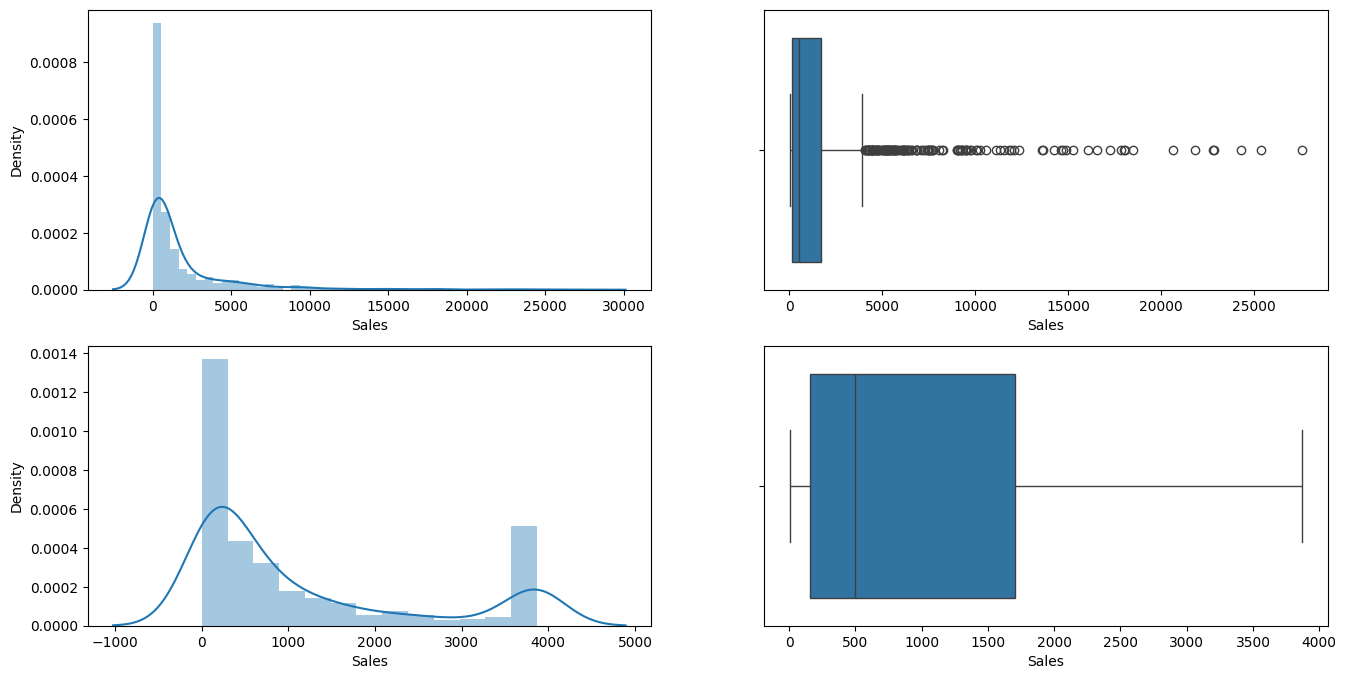

In [ ]:
# Analyzing the distribution of data in sales column before and after capping the outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Sales'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Sales'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Sales'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['Sales'])
plt.show()

###Convert categorical variables to numerical representation using one-hot encoding or label encoding.

One Hot Encoding Using Pandas

In [ ]:
new_df_cap.head()

Order Date  Order Quantity  Sales ID        Sales  \
0 2010-10-13               6       101   224.294400   
1 2012-10-01              49       102  3869.447625   
2 2012-10-01              27       103   232.283700   
3 2011-07-10              30       104  3869.447625   
4 2010-08-28              19       105   380.714400   

                                        Product Name  \
0   Eldon Base for stackable storage shelf, platinum   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl   
3                                               R380   
4                           Holmes HEPA Air Purifier   

             Product Sub-Category Product Category  Discount  Unit Price  \
0          Storage & Organization  Office Supplies      0.04       38.94   
1                      Appliances  Office Supplies      0.07      208.16   
2  Binders and Binder Accessories  Office Supplies      0.01        8.69   
3    Telephones and Communication       Technology      0.08      195.99   
4                      Appliances  Office Supplies      0.08       21.78   

   Product Base Margin     Profit Product ID  Advertising Expenditure  \
0                 0.80   177.5664      OF_01                   1.9470   
1                 0.58  5201.9184      OF_02                  10.4080   
2                 0.39    89.1594      OF_03                   0.4345   
3                 0.58  2939.8500      TE_01                  29.3985   
4                 0.50   173.8044      OF_04                   1.0890   

   Sales Representative  Product Review Rating Customer ID    Customer Name  \
0                     1                      5    CG-12520      Claire Gute   
1                     1                      2    CG-12520      Claire Gute   
2                     2                      5    DV-13045  Darrin Van Huff   
3                     3                      1    SO-20335   Sean O'Donnell   
4                     2                      4    SO-20335   Sean O'Donnell   

  Customer Segment                    Email ID                   Address  \
0   Small Business     claire_gute@example.com       Henderson, Kentucky   
1         Consumer     claire_gute@example.com       Henderson, Kentucky   
2         Consumer     darrin_huff@example.com   Los Angeles, California   
3        Corporate  sean_o'donnell@example.com  Fort Lauderdale, Florida   
4         Consumer  sean_o'donnell@example.com  Fort Lauderdale, Florida   

  Region  Region ID  
0  South          1  
1  South          1  
2   West          2  
3  South          1  
4  South          1

performed One Hot Encoding for 'Customer Segment' and 'Product Category'

In [ ]:
new_df_cap['Customer Segment'].value_counts() # finding unique categoies for customere segment

Corporate         488
Home Office       208
Small Business    180
Consumer          124
Name: Customer Segment, dtype: int64

In [ ]:
new_df_cap['Product Category'].value_counts() # finding unique categories for 'Product Category'

Office Supplies    538
Technology         243
Furniture          219
Name: Product Category, dtype: int64

In [ ]:
# k-1 one hot encoding
pd.get_dummies(new_df_cap, columns=['Customer Segment', 'Product Category'], drop_first=True) # to remove the problem of multi coliniarity

Order Date  Order Quantity  Sales ID        Sales  \
0   2010-10-13               6       101   224.294400   
1   2012-10-01              49       102  3869.447625   
2   2012-10-01              27       103   232.283700   
3   2011-07-10              30       104  3869.447625   
4   2010-08-28              19       105   380.714400   
5   2010-08-28              21       106   132.468000   
6   2011-06-17              12       107    84.972000   
7   2011-06-17              22       108   856.055200   
8   2011-03-24              21       109  2697.874200   
9   2010-02-26              44       110   203.781600   
10  2010-11-23              45       111   190.674000   
11  2010-11-23              32       112   121.344000   
12  2012-06-08              32       113   696.960000   
13  2012-06-08              31       114  1427.884800   
14  2012-08-04              15       115    77.616000   
15  2011-05-30              46       116  1779.891800   
16  2009-11-25              16       117   234.211200   
17  2012-02-14              44       118  3869.447625   
18  2012-02-14              11       119   588.802500   
19  2012-04-15              15       120   930.459000   
20  2012-04-15              18       121  2779.741800   
21  2010-03-12              13       122    43.173000   
22  2010-03-12              21       123    93.964500   
23  2011-03-09              33       124   474.903000   
24  2011-03-09              38       125   176.529000   
25  2012-08-04              30       126    78.624000   
26  2011-05-06              23       127    61.400800   
27  2010-12-23              25       128  3869.447625   
28  2010-11-08              28       129   362.342400   
29  2012-10-21              49       130   274.086400   
30  2011-01-01              10       131    59.202000   
31  2011-01-01              21       132   809.142600   
32  2011-10-10              39       133   276.537300   
33  2011-10-10              24       134   498.722400   
34  2010-09-23              27       135  1017.446400   
35  2011-07-19              39       136  3480.106500   
36  2009-10-09              47       137   182.830000   
37  2009-10-09              49       138  3869.447625   
38  2009-10-09              18       139   501.876000   
39  2010-12-09              30       140  3869.447625   
40  2012-10-08               5       141    36.848000   
41  2012-05-02              21       142   398.370000   
42  2010-03-08               8       143   927.920000   
43  2011-05-28               5       144    14.256000   
44  2010-09-19               9       145    37.900800   
45  2011-08-31              11       146  1330.454400   
46  2011-08-31              50       147   181.875000   
47  2011-08-31               3       148    34.261200   
48  2011-08-31              30       149  3869.447625   
49  2011-07-08               7       150    54.747000   
50  2009-01-30              42       151  1201.284000   
51  2012-01-08              11       152    43.342200   
52  2010-11-07              22       153   122.892000   
53  2010-04-29              12       154   105.378000   
54  2011-12-31               8       155    63.920000   
55  2009-08-12               7       156   366.030000   
56  2009-08-12               3       157   239.025600   
57  2011-11-12              44       158  3733.470400   
58  2011-11-12              25       159  1999.267500   
59  2012-01-20              19       160   202.851600   
60  2009-03-20               6       161  3869.447625   
61  2012-07-21              40       162   248.832000   
62  2012-07-21              18       163   111.974400   
63  2012-06-12              11       164   287.974500   
64  2009-01-15              41       165   202.138200   
65  2009-01-15              47       166   286.512000   
66  2010-06-04              40       167   401.120000   
67  2010-02-18              18       168   124.830000   
68  2011-11-16              32       169  1263.360000   
69  2011-11-16

### One Hot Encoding using Scikit Learn

In [ ]:

# pandas does not remember the columns exact position, which might change after the code rerun. for machine learning problems,
# we use OHE from scikit learn.
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32) # removing the first column
ohe.fit_transform(new_df_cap[['Customer Segment', 'Product Category']])


array([[0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0]], dtype=int32)

### Normalize the 'Sales' column to a scale between 0 and 1.

<Axes: xlabel='Profit', ylabel='Density'>

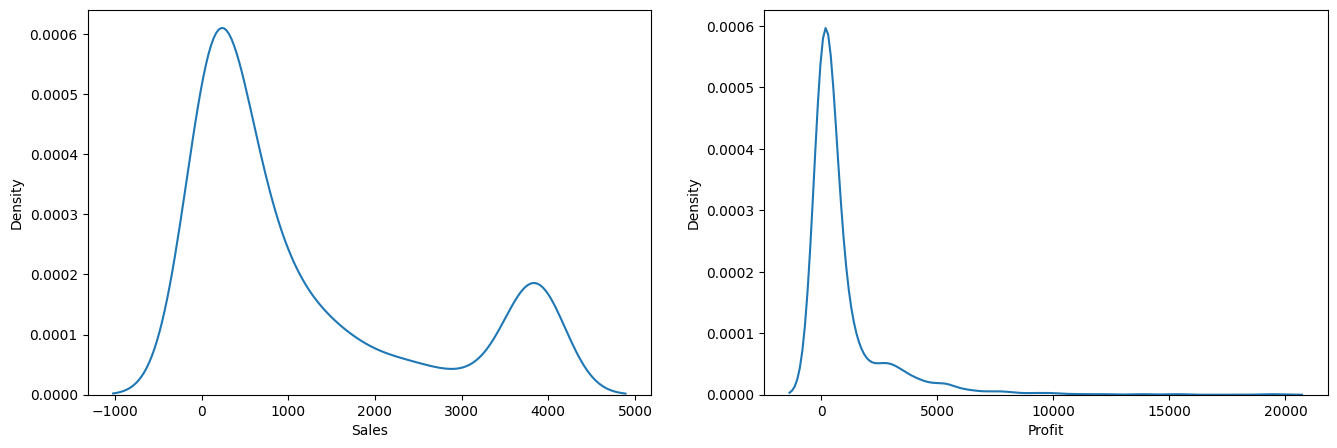

In [ ]:
# Using Min Max Scaling {(xi-xmean)/xmax-xmin} to scale the numerical values between 0 and 1:
# It helps the ML model to make better predictions
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(new_df_cap['Sales'])

plt.subplot(1,2,2)
sns.kdeplot(new_df_cap['Profit'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
sales_values = new_df_cap[['Sales', 'Profit']]

scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(sales_values)

scaled_sales



array([[0.0572919 , 0.00912994],
       [1.        , 0.26894226],
       [0.05935809, 0.00455836],
       ...,
       [0.08836184, 0.00688471],
       [0.19672883, 0.01754161],
       [0.21024357, 0.0155548 ]])

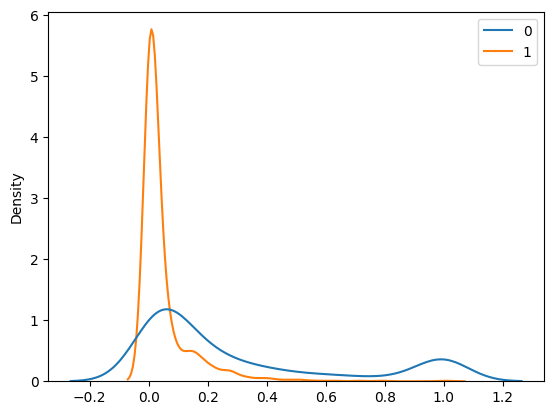

In [ ]:
#2 Distribution od data after applying Min-Max scaling for sales
sns.kdeplot(scaled_sales)
plt.show()

### Level 5: Data Visualization with Matplotlib

1. Create a bar chart to visualize the total sales amount by product category.

<Figure size 1000x800 with 0 Axes>

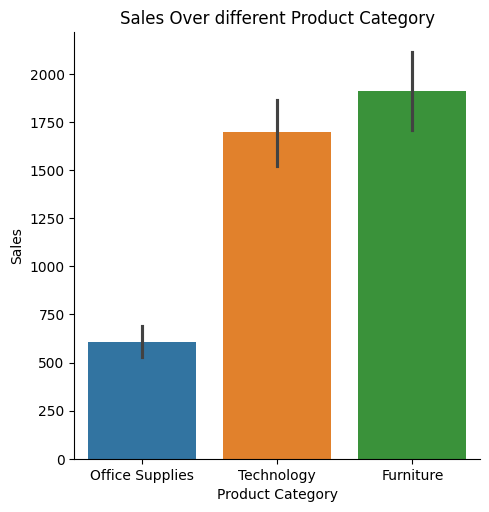

In [ ]:
# Barplot: Info about central tendency
plt.figure(figsize=(10, 8))
sns.catplot(x=new_df_cap['Product Category'], y=new_df_cap['Sales'], hue=new_df_cap['Product Category'], kind='bar', data=new_df_cap)
plt.title("Sales Over different Product Category")
plt.show()

2. Generate a line plot to show the sales trend over time.

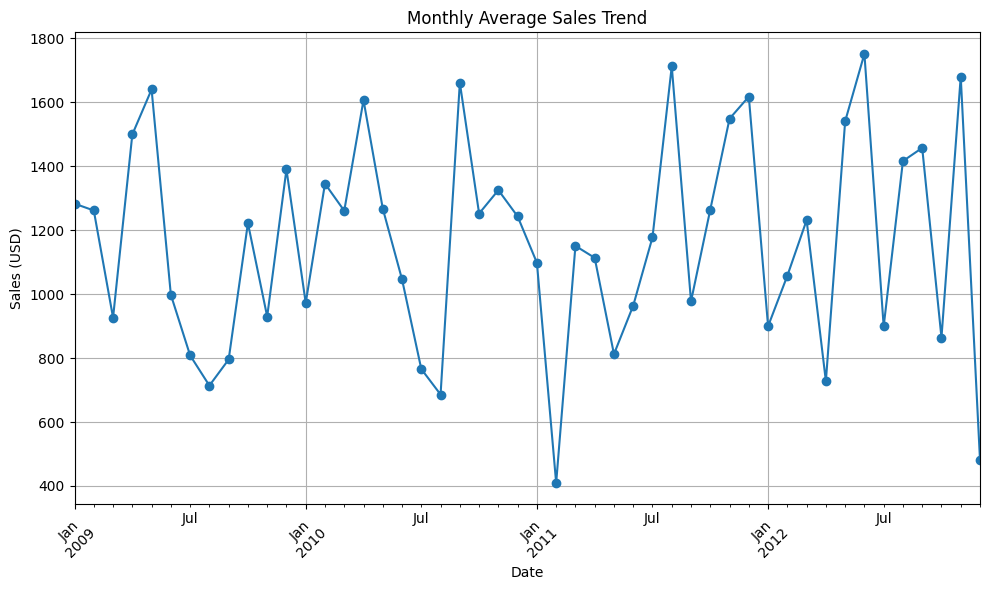

In [ ]:
df_line = pd.DataFrame(new_df_cap)
df_line['Order Date'] = pd.to_datetime(df['Order Date'])
df_line.set_index('Order Date', inplace=True)

# Resample data on monthly basis and calculate the mean
monthly_avg_sales = df_line['Sales'].resample('M').mean()

# Plot the data
plt.figure(figsize=(10, 6))
monthly_avg_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Average Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Create a pie chart to represent the distribution of sales across different regions.

In [ ]:
#3. Create a pie chart to represent the distribution of sales across different regions
sales_diff_regions = new_df_cap.groupby('Region')['Sales'].sum()
sales_diff_regions

Region
Central    295026.197375
East       395603.064700
South      158335.989150
West       309749.846075
Name: Sales, dtype: float64

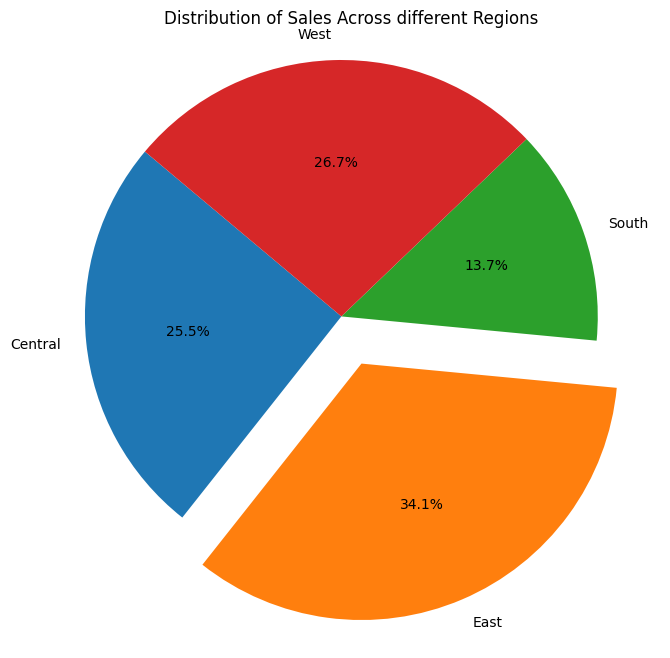

In [ ]:
# Set up the pie chart
plt.figure(figsize=(8, 8))
myexplode = [0, 0.2, 0, 0]

# Create the pie chart
plt.pie(sales_diff_regions, labels=sales_diff_regions.index, autopct='%1.1f%%', startangle=140, explode=myexplode)

# Add title
plt.title('Distribution of Sales Across different Regions')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

4. Generate a boxplot to compare the sales performance of different customer segments

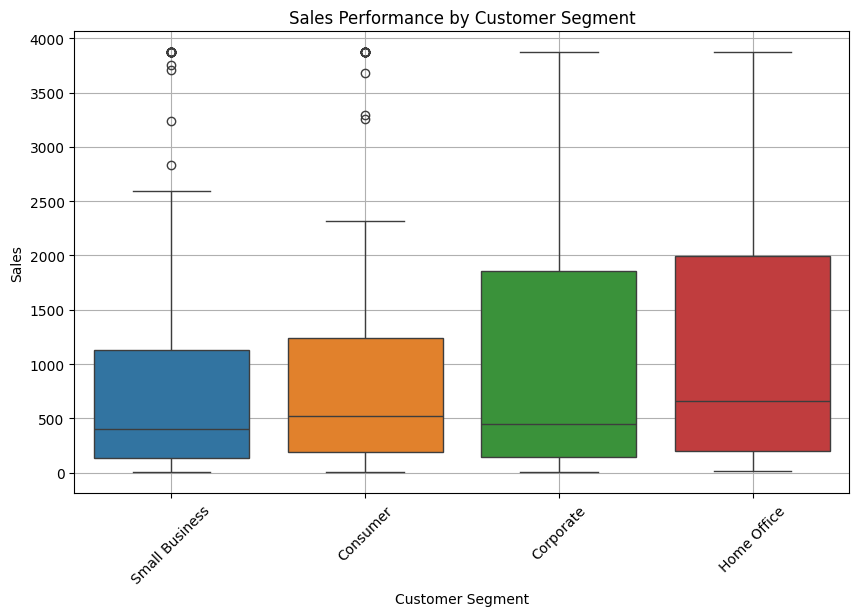

In [ ]:
#Generate a boxplot to compare the sales performance of different customer segments.

plt.figure(figsize=(10, 6))

sns.boxplot(x=new_df_cap['Customer Segment'], y=new_df_cap['Sales'], hue=new_df_cap['Customer Segment'], data=new_df_cap)


plt.title('Sales Performance by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')


plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5. Visualize the relationship between sales and advertising expenditure using a scatter plot.

Text(0, 0.5, 'Sales')

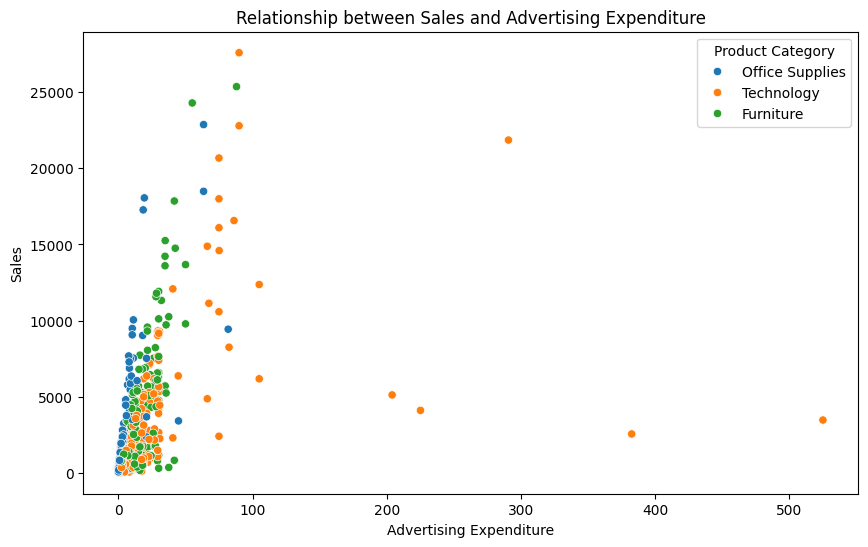

In [ ]:
#Visualize the relationship between sales and advertising expenditure using a scatter plot.
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x=new_df_cap['Advertising Expenditure'], y=df['Sales'], hue=df['Product Category'],data=new_df_cap)


plt.title('Relationship between Sales and Advertising Expenditure')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')

### Level 10: Advanced Data Analysis Techniques with NumPy and Matplotlib

Visualize the original and smoothed time series using Matplotlib line plots.

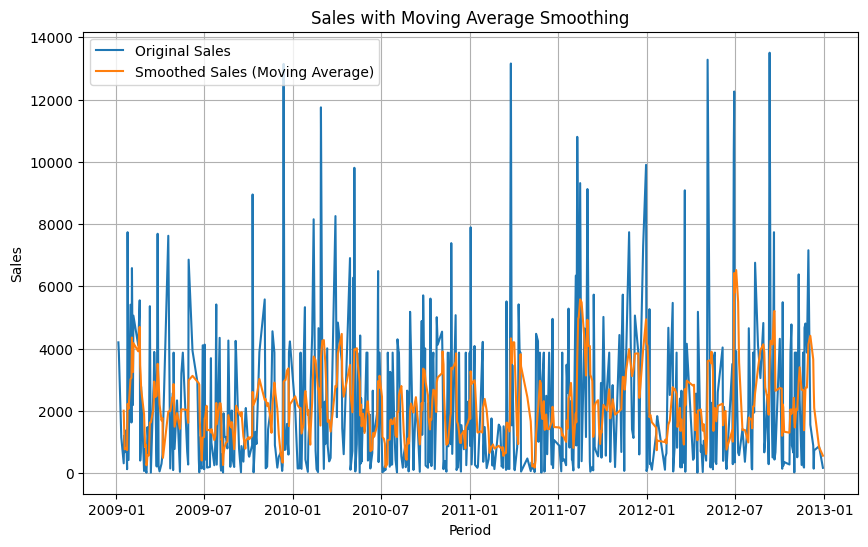

In [ ]:
# Group the data by week and sum the sales values
sales_data = df_line.groupby(df_line.index)['Sales'].sum()

# Smooth the sales data using moving average with window size 5 (adjust as needed)
window_size = 5
smoothed_sales = sales_data.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot original sales data
sns.lineplot(x=sales_data.index, y=sales_data, label='Original Sales')

# Plot smoothed sales data
sns.lineplot(x=smoothed_sales.index, y=smoothed_sales, label='Smoothed Sales (Moving Average)')

# Customize the plot
plt.title('Sales with Moving Average Smoothing')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend()  # Show legend
plt.grid(True)

# Show plot
plt.show()

<ipython-input-75-604970895489>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  weekly_sales = df_line.groupby(df_line.index.week)['Sales'].sum()


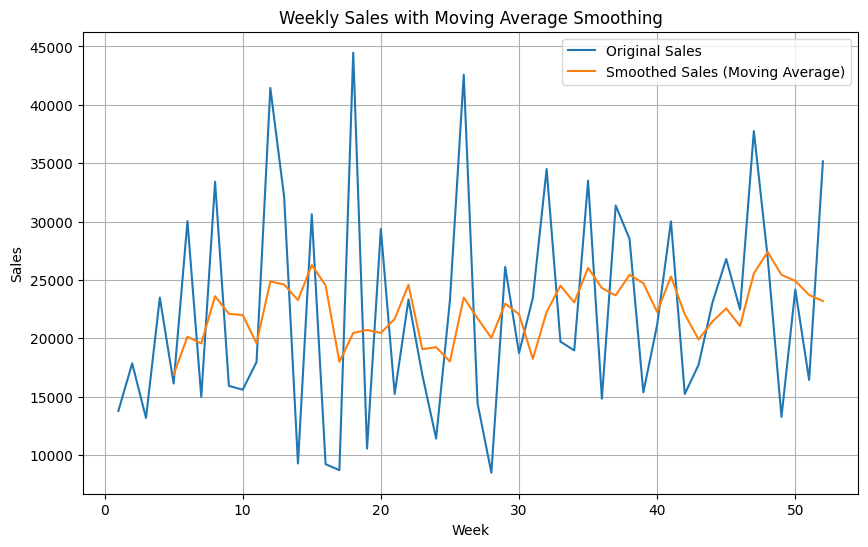

In [ ]:

# Group the data by week and sum the sales values
weekly_sales = df_line.groupby(df_line.index.week)['Sales'].sum()

# Smooth the sales data using moving average with window size 5 (adjust as needed)
window_size = 5
smoothed_sales = weekly_sales.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot original sales data
sns.lineplot(x=weekly_sales.index, y=weekly_sales, label='Original Sales')

# Plot smoothed sales data
sns.lineplot(x=smoothed_sales.index, y=smoothed_sales, label='Smoothed Sales (Moving Average)')

# Customize the plot
plt.title('Weekly Sales with Moving Average Smoothing')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()  # Show legend
plt.grid(True)

# Show plot
plt.show()

 Create word frequency arrays to identify common themes in customer reviews.

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('punkt')

# Sample customer reviews
reviews = [
    "The product is excellent, highly recommend it!",
    "I love this product. It's amazing.",
    "Terrible customer service. Will not buy again.",
    "Great value for the price. Highly satisfied.",
    "Very disappointed with the quality. Not worth it.",
    "This item exceeded my expectations. Definitely worth the investment!",
    "I can't get enough of this product! It's simply outstanding.",
    "Horrible experience with customer support. Avoid at all costs.",
    "Exceptional value for the money. Couldn't be happier with my purchase.",
    "Absolutely appalled by the lack of quality. Complete waste of money.",
    "Awful customer experience. Will never buy from them again.",
    "Incredible value for the price. Extremely satisfied.",
    "Extremely disappointed with the quality. Definitely not worth it.",
    "This product surpassed my expectations. Definitely worth every penny!",
    "I'm obsessed with this product! It's simply phenomenal.",
    "Absolutely terrible customer service. Avoid at all costs.",
    "Remarkable value for money. Couldn't be happier with my purchase.",
    "Absolutely disgusted by the lack of quality. Total waste of money.",
    "The product is top-notch, highly recommend it!",
    "I'm in love with this product. It's absolutely remarkable.",
    "Horrible customer service experience. Will never return.",
    "Unbeatable value for the price. Completely satisfied.",
    "Completely let down by the quality. Not worth the money.",
    "This product exceeded all expectations. Definitely a wise investment!",
    "I'm completely hooked on this product! It's simply unbeatable.",
    "Dreadful customer service. Stay away at all costs.",
    "Outstanding value for the price. Delighted with my purchase.",
    "Utterly disappointed with the quality. Total waste of money.",
    "Absolutely phenomenal product. Highly recommend it!",
"This product is incredible. It's simply amazing.",
"Appalling customer service. Will never purchase again.",
"Exceptional value for money. Extremely satisfied.",
"Completely unsatisfied with the quality. Not worth it at all.",
"This product went above and beyond my expectations. Definitely worth every penny!",
"I'm absolutely obsessed with this product! It's outstanding.",
"Terrible experience with customer support. Avoid like the plague.",
"Unmatched value for the money. Couldn't be happier.",
"Completely shocked by the lack of quality. Waste of money.",
"Absolutely dreadful customer experience. Will never shop here again.",
"Remarkable value for the price. Completely satisfied.",
"Truly disappointed with the quality. Not worth the investment.",
"This product completely blew me away. Definitely a worthwhile investment!",
"I'm absolutely enamored with this product! It's unbeatable.",
"Avoid their customer service at all costs. It's abysmal.",
"Outstanding value for the price. Couldn't be happier.",
"Absolutely horrified by the lack of quality. Waste of money.",
"This product is top-notch. Highly recommended.",
"I'm head over heels for this product. It's truly remarkable.",
"Absolutely horrendous customer service experience. Never again.",
"Unbeatable value for the price. Completely satisfied.",
"Utterly let down by the quality. Not worth the money.",
"This product exceeded all expectations. Definitely worth it!",
"I'm absolutely hooked on this product! It's unparalleled.",
"Stay away from their customer service. It's atrocious.",
"Outstanding value for the price. Thrilled with my purchase.",
"Absolutely disgusted with the quality. Waste of money.",
"Phenomenal product. Highly recommend it!",
"This product is phenomenal. It's simply incredible.",
"Absolutely awful customer service. Never purchasing again.",
"Excellent value for the money. Extremely satisfied.",
"Completely unsatisfied with the quality. Not worth it.",
"This product exceeded my wildest expectations. Definitely worth every penny!",
"I'm absolutely in love with this product! It's exceptional.",
"Horrible experience with their customer support. Avoid at all costs.",
"Exceptional value for the price. Couldn't be happier.",
"Disgusted by the lack of quality. Total waste of money.",
"Top-notch product. Highly recommended.",
"This product is phenomenal. It's absolutely remarkable.",
"Absolutely horrendous customer service experience. Will never return.",
"Unmatched value for the price. Completely satisfied.",
"Completely disappointed with the quality. Not worth the investment.",
"This product went beyond my expectations. Definitely worth it!",
"I'm absolutely obsessed with this product! It's unbeatable.",
"Avoid their customer service like the plague. It's terrible.",
"Outstanding value for the price. Couldn't be happier.",
"Absolutely appalled by the lack of quality. Total waste of money.",
"This product is top-notch. Highly recommended.",
"I'm completely smitten with this product. It's truly outstanding.",
]

# Tokenization, normalization, and removing stopwords
stop_words = set(stopwords.words('english'))
word_freq = Counter()
for review in reviews:
    words = nltk.word_tokenize(review.lower())  # Tokenization and normalization
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove non-alphanumeric characters and stopwords
    word_freq.update(words)

# Print the most common words and their frequencies
print("Most common words in the customer reviews:")
for word, freq in word_freq.most_common(10):  # Print top 10 most common words
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Most common words in the customer reviews:
product: 29
absolutely: 18
customer: 16
value: 16
quality: 16
money: 15
worth: 14
completely: 12
service: 11
price: 11


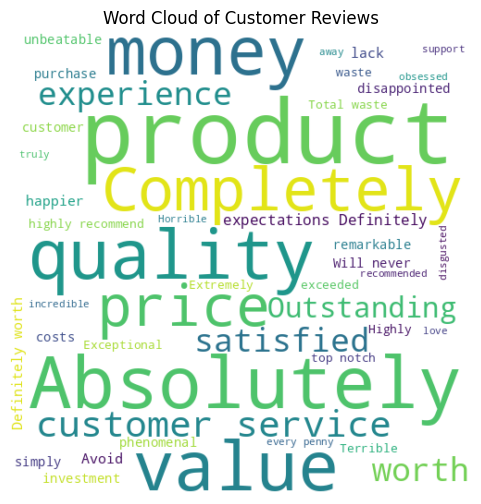

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_reviews = ' '.join(reviews)

# Generate word cloud
wordcloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(all_reviews)

# Display the word cloud using Matplotlib
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Customer Reviews')
plt.show()

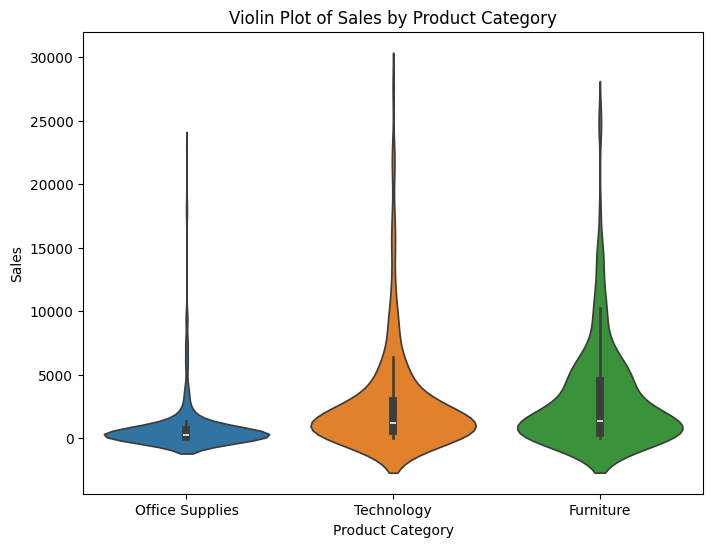

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Product Category', y='Sales', hue='Product Category', data=df)
plt.title('Violin Plot of Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()